In this notebook, bitcoin and other cryptocurrency data is explored. The dataset is cleaned by discarding cryptocurrencies without market capitalization and Bitcoin is compared with other currencies and the data is visualized. 

### Importing Libraries and Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load dataset and EDA

In [4]:
data=pd.read_csv('Dataset/coinmarketcap_06122017.csv')
data.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [6]:
market_cap=data[['id','market_cap_usd']]
market_cap.count()

id                1326
market_cap_usd    1031
dtype: int64

In [7]:
# Discarding rows without market capitalization
market_cap=market_cap.dropna()
market_cap.countnt()

id                1031
market_cap_usd    1031
dtype: int64

#### Comparing Bitcoin with other cryptocurrencies

In [9]:
# Selecting the top 10 coins and assign it to a variable
m_cap10=market_cap.sort_values('market_cap_usd',ascending=False).head(10)
m_cap10

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
5,dash,5.794076e+09
6,litecoin,5.634498e+09
7,bitcoin-gold,4.920065e+09
8,monero,4.331688e+09
9,cardano,3.231420e+09


In [11]:
# Calculate market capitalization percentage
m_cap10=m_cap10.assign(m_cap_perc=lambda x:(x.market_cap_usd/m_cap10.market_cap_usd.sum())*100).set_index('id')
m_cap10

,market_cap_usd,m_cap_perc
id,,
bitcoin,2.130493e+11,64.579199
ethereum,4.352945e+10,13.194580
bitcoin-cash,2.529585e+10,7.667641
iota,1.475225e+10,4.471679
ripple,9.365343e+09,2.838809
dash,5.794076e+09,1.756291
litecoin,5.634498e+09,1.707920
bitcoin-gold,4.920065e+09,1.491363
monero,4.331688e+09,1.313015


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bitcoin'),
  Text(1, 0, 'ethereum'),
  Text(2, 0, 'bitcoin-cash'),
  Text(3, 0, 'iota'),
  Text(4, 0, 'ripple'),
  Text(5, 0, 'dash'),
  Text(6, 0, 'litecoin'),
  Text(7, 0, 'bitcoin-gold'),
  Text(8, 0, 'monero'),
  Text(9, 0, 'cardano')])

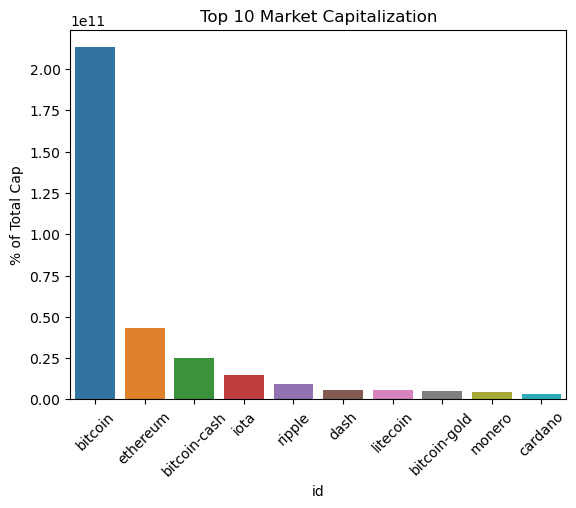

In [13]:
# Bar plot with % of market cap
ax=sns.barplot(data=m_cap10,x=m_cap10.index,y='market_cap_usd')
plt.title('Top 10 Market Capitalization')
plt.ylabel('% of Total Cap')
plt.xticks(rotation=45)

#### Exploring Volatility of Cryptocurrencies

In [15]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility=data[['id','percent_change_24h','percent_change_7d']]

# Setting index to 'id' and removing all rows with NaN
volatility=volatility.set_index('id').dropna()

# Sort the dataframe by percent_change_24h in ascending order
volatility=volatility.sort_values('percent_change_24h',ascending=True)
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


<AxesSubplot:xlabel='id'>

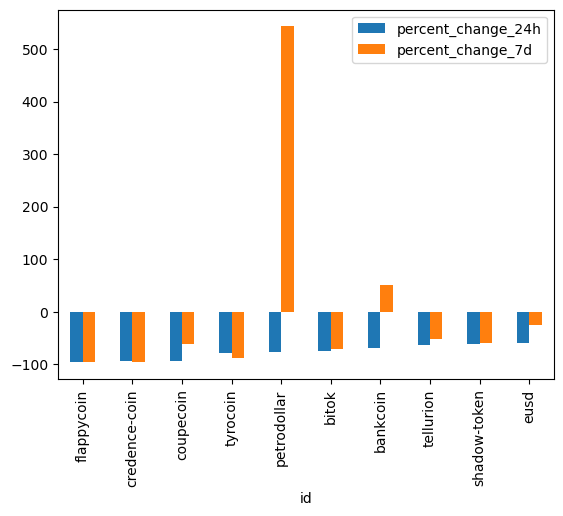

In [16]:
volatility.head(10).plot.bar()

#### Top 10 gainers and losers in the crypto market

Text(0, 0.5, '% change')

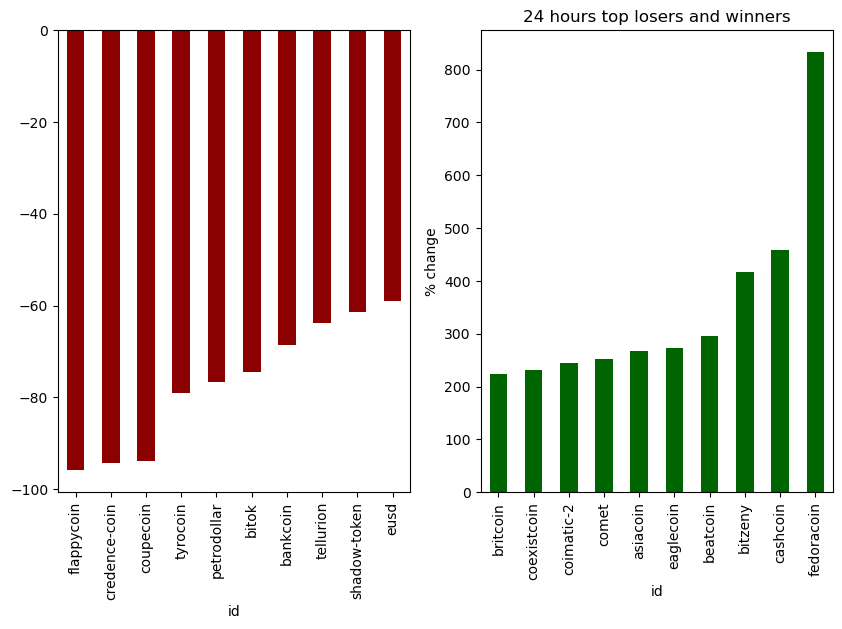

In [35]:
# Plot top 10 gainers and losers in 24 hours
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax=volatility.percent_change_24h[:10].plot.bar(color='darkred',ax=axes[0])
ax=volatility.percent_change_24h[-10:].plot.bar(color='darkgreen',ax=axes[1])
ax.set_title('24 hours top losers and winners')
ax.set_ylabel('% change')

Text(0, 0.5, '% change')

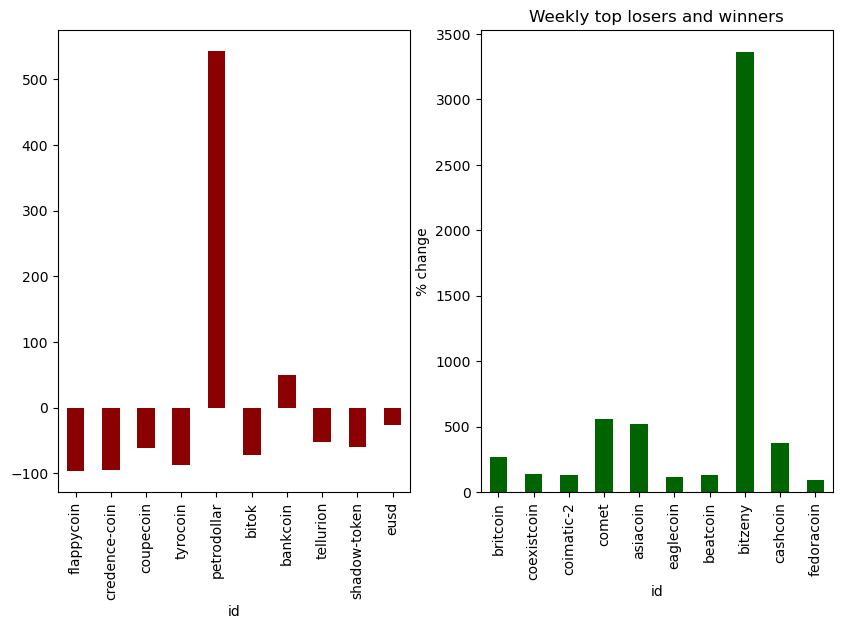

In [38]:
volatility7d=volatility.sort_values('percent_change_7d',ascending=True)
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax=volatility.percent_change_7d[:10].plot.bar(color='darkred',ax=axes[0])
ax=volatility.percent_change_7d[-10:].plot.bar(color='darkgreen',ax=axes[1])
ax.set_title('Weekly top losers and winners')
ax.set_ylabel('% change')